# $\chi^2$ minimisation

Given the functional form:

$r(p) = \frac{y_i - f(x_i,p)}{\sigma_i}$

where $y_i$ are the data points and $f(x_i,p)$ is the model.


$\chi^2$ minimisation requires you to minimise it so that we find the best value of $p$:

$\min \sum_1^N (r(p))^2$

The advantage of this method is that you can include the uncertainties in $y_i$.

In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_3 = pd.read_csv('data_pendulum_new.csv')

#print(data_3)
length = data_3["Length(m)"]
p_mean = data_3["PeriodMean(s)"]
p_stde = data_3["PeriodStd(s)"]

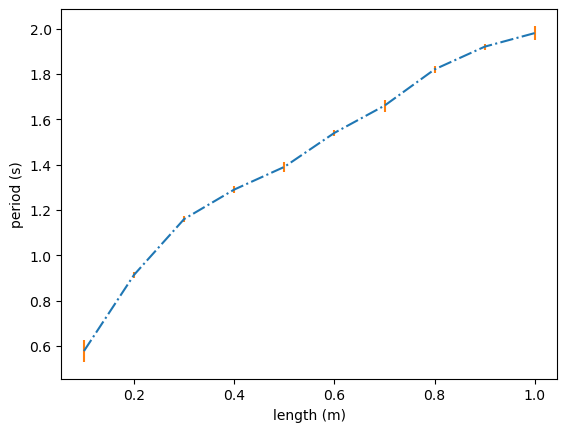

In [5]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(length, p_mean, linestyle="-.", label="Free fall experiment")
ax.errorbar(length, p_mean, yerr = p_stde, linestyle='') # 68% confidence level
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()

In [6]:
# Define X^2 function

def chisqfunc(b):
    model = b*np.sqrt(length)
    chisq = np.sum(((p_mean - model) / p_stde)**2)
    return chisq

We can use opt.minimize from the scipy package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


This function minimises a scalar function of one or more variables.


The optimization result is represented as a OptimizeResult object with attributes:


- **x** the solution array
- **success** a Boolean flag indicating if the optimizer exited successfully
- **a message** which describes the cause of the termination.


In [7]:
p_mean = p_mean
p_stde = p_stde

x0 = np.array((0))

#print(x0)

# Minimise the function.
result =  opt.minimize(chisqfunc, x0)
              
print(result)
print(result.x)

assert result.success==True

#Storing the result
a = result.x

#%matplotlib inline
#plt.plot(length, p_mean, marker='d', linestyle='')
#plt.plot(length, a*np.sqrt(length))

      fun: 26.73219900652044
 hess_inv: array([[2.65988753e-05]])
      jac: array([5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([2.02239971])
[2.02239971]


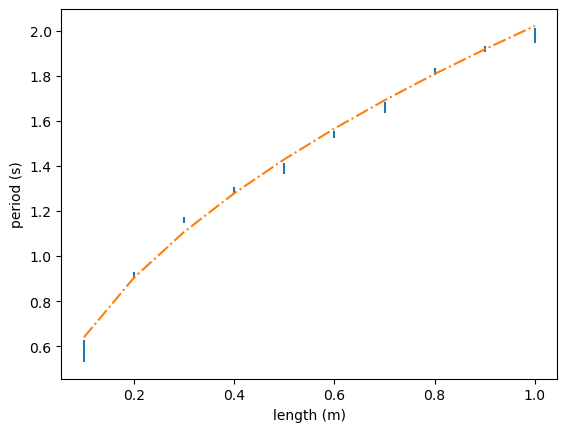

In [9]:
# And now we plot
fig, ax = plt.subplots()

ax.errorbar(length, p_mean, yerr = p_stde, linestyle='')
ax.plot(length, a*np.sqrt(length), linestyle="-.", label="fit")
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()

In [10]:
from scipy.optimize import curve_fit

#define a function to fit to the data

def func3(x, a):
    return a * np.sqrt(x)

coef3, cova3 = curve_fit(func3, length, p_mean)

print(coef3, cova3)

print('T = %.5f * (l)^0.5' % (coef3[0]))

[2.00667292] [[0.00021477]]
T = 2.00667 * (l)^0.5


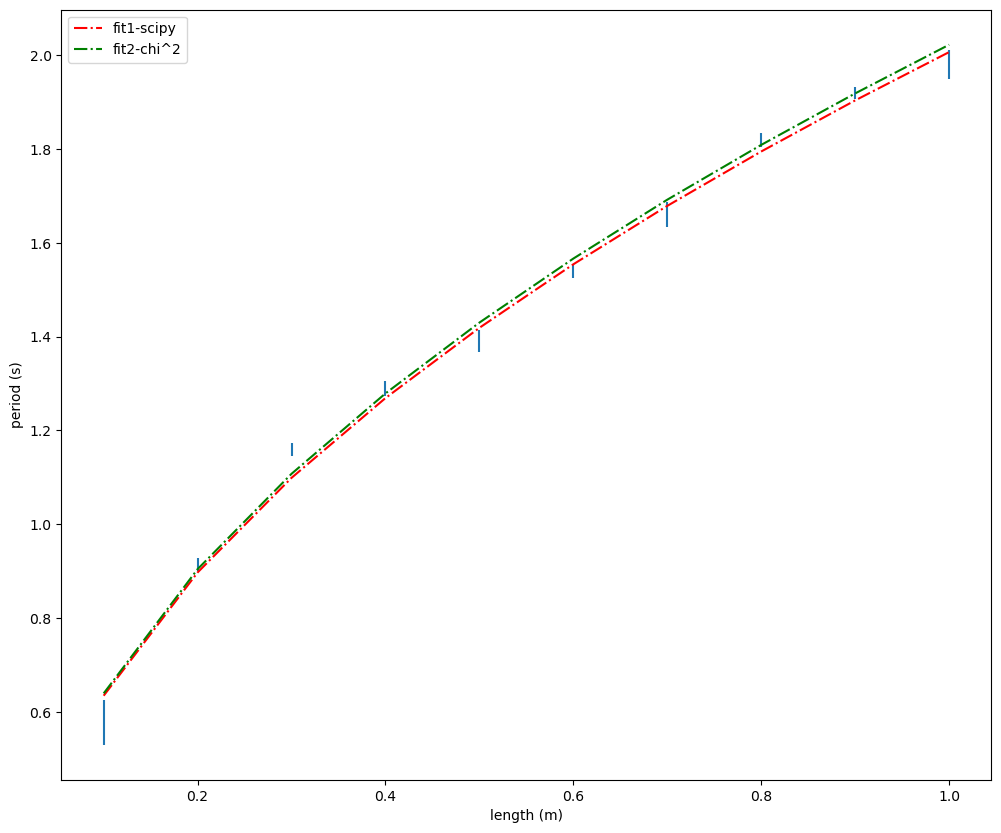

In [14]:
# And now we plot
fig, ax = plt.subplots(figsize=(12,10))

ax.errorbar(length, p_mean, yerr = p_stde, linestyle='')
ax.plot(length, (coef3[0])*np.sqrt(length), linestyle="-.", label="fit1-scipy", color = 'red')
ax.plot(length, a*np.sqrt(length), linestyle="-.", label="fit2-chi^2", color = 'green')
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
ax.legend()
plt.show()